### >> Importaciones

In [1]:
import os
import random as rn


import pandas as pd
import scorecardpy as sc
import numpy as np

SEED = 29082013
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

In [2]:
def calcular_pesos(modelo):
    coef_model = pd.DataFrame(modelo.tvalues,columns=['t_value'])
    coef_model['t_value2'] = np.power(coef_model['t_value'], 2)
    coef_model['total'] = sum(coef_model['t_value2'])
    coef_model['part'] = coef_model['t_value2'] / coef_model['total']
    coef_model['pesos'] = coef_model['part'] * 100
    return coef_model['pesos'].sort_values(ascending=True)

### >> Load dataset

In [3]:
x_train = pd.read_csv("X_train.csv")
x_valid = pd.read_csv("X_valid.csv")

y_train = pd.read_csv("y_train.csv")
y_valid = pd.read_csv("y_valid.csv")

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((54315, 59), (9586, 59), (54315, 1), (9586, 1))

In [4]:
x_train.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,1.0,0.041667,0.000341,0.827331,0.142857,0.411765,0.6125,0.267442,0.189594,0.105079,...,0.026910,0.337625,0.442476,0.221238,0.188728,0.219135,0.117486,0.270445,0.315009,0.165935
1,1.0,0.166667,0.000246,0.606498,0.142857,0.411765,0.5750,0.593023,0.138987,0.019258,...,0.204861,0.318311,0.420715,0.052589,0.394364,0.417064,0.055901,0.537402,0.570048,0.075070
2,1.0,0.062500,0.004814,0.306880,0.285714,0.352941,0.4625,0.383721,0.140652,0.051969,...,0.026693,0.223686,0.157051,0.104701,0.227156,0.128062,0.091545,0.291020,0.167333,0.117527


In [5]:
x_valid.head(3)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,...,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo
0,1.0,0.104167,0.000123,0.384329,0.285714,0.447059,0.4875,0.581395,0.176148,0.039051,...,0.062934,0.296152,0.197874,0.079150,0.416738,0.2193,0.094060,0.456495,0.246377,0.103826
1,1.0,0.104167,0.000049,0.473356,0.000000,0.588235,0.4375,0.325581,0.000000,0.000000,...,0.000000,0.353047,0.000000,0.091970,0.317677,0.0000,0.073612,0.235745,0.000000,0.059389
2,1.0,0.020833,0.000051,0.513038,0.142857,0.576471,0.4250,0.534884,0.117570,0.130321,...,0.023438,0.337476,0.442308,0.442308,0.486763,0.5060,0.542570,0.373845,0.413793,0.435942


In [6]:
y_train.fillna(-1).value_counts()

Incumplimiento
0                 46648
1                  7667
dtype: int64

In [7]:
y_valid.fillna(-1).value_counts()

Incumplimiento
0                 8233
1                 1353
dtype: int64

### >> CORRELACION

In [8]:
x_train['target'] = y_train.values
matriz_corr = x_train.corr(method='spearman')

matriz_corr.style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,Empleado,Tiempo_empleo,Saldo_cuenta,Valor_prestamo,Cuentas_otros,Autocontrol,Impulsividad,Confianza,cuentas_otros_x_valor_prestamo,cuentas_otros_x_valor_prestamo_entre_tiempo_empleo,cuentas_otros_x_saldo_cuenta,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,cuentas_otros_x_tiempo_empleo,cuentas_otros_x_autocontrol,cuentas_otros_x_autocontrol_entre_tiempo_empleo,cuentas_otros_x_impulsividad,cuentas_otros_x_impulsividad_entre_tiempo_empleo,cuentas_otros_x_confianza,cuentas_otros_x_confianza_entre_tiempo_empleo,valor_prestamo_x_saldo_cuenta,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo,valor_prestamo_x_tiempo_empleo,valor_prestamo_x_tiempo_empleo_entre_cuentas_otros,valor_prestamo_x_autocontrol,valor_prestamo_x_autocontrol_entre_cuentas_otros,valor_prestamo_x_autocontrol_entre_tiempo_empleo,valor_prestamo_x_impulsividad,valor_prestamo_x_impulsividad_entre_cuentas_otros,valor_prestamo_x_impulsividad_entre_tiempo_empleo,valor_prestamo_x_confianza,valor_prestamo_x_confianza_entre_cuentas_otros,valor_prestamo_x_confianza_entre_tiempo_empleo,saldo_cuenta_x_tiempo_empleo,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,saldo_cuenta_x_autocontrol,saldo_cuenta_x_autocontrol_entre_cuentas_otros,saldo_cuenta_x_autocontrol_entre_tiempo_empleo,saldo_cuenta_x_impulsividad,saldo_cuenta_x_impulsividad_entre_cuentas_otros,saldo_cuenta_x_impulsividad_entre_tiempo_empleo,saldo_cuenta_x_confianza,saldo_cuenta_x_confianza_entre_cuentas_otros,saldo_cuenta_x_confianza_entre_tiempo_empleo,tiempo_empleo_x_autocontrol,tiempo_empleo_x_autocontrol_entre_cuentas_otros,tiempo_empleo_x_impulsividad,tiempo_empleo_x_impulsividad_entre_cuentas_otros,tiempo_empleo_x_confianza,tiempo_empleo_x_confianza_entre_cuentas_otros,autocontrol_x_impulsividad,autocontrol_x_impulsividad_entre_cuentas_otros,autocontrol_x_impulsividad_entre_tiempo_empleo,autocontrol_x_confianza,autocontrol_x_confianza_entre_cuentas_otros,autocontrol_x_confianza_entre_tiempo_empleo,impulsividad_x_confianza,impulsividad_x_confianza_entre_cuentas_otros,impulsividad_x_confianza_entre_tiempo_empleo,target
Empleado,1.00000,0.61396,0.00270,-0.00463,0.00038,0.00647,-0.00503,0.00187,0.00100,0.37668,0.00352,0.40968,0.40985,0.00056,0.40968,-0.00030,0.40968,0.00240,0.40968,-0.00100,0.00477,0.55301,0.55301,0.37668,0.00130,0.00623,0.55301,-0.00803,0.00553,0.55301,-0.00387,0.00695,0.55301,0.61240,0.40968,0.00316,0.00513,0.61240,0.00256,0.00529,0.61240,0.00274,0.00561,0.61240,0.61241,0.40968,0.61241,0.40968,0.61241,0.40968,0.00350,0.00673,0.61240,0.00651,0.00901,0.61240,-0.00215,0.00811,0.61240,-0.00068
Tiempo_empleo,0.61396,1.00000,0.00137,-0.00128,-0.00269,0.00448,-0.00591,0.00414,-0.00214,0.07964,0.00005,0.18811,0.48244,-0.00223,0.06322,-0.00396,0.06332,-0.00087,0.06351,0.00190,0.00308,0.21090,0.82414,0.41900,0.00242,0.00346,-0.07056,-0.00475,0.00274,-0.07105,0.00262,0.00449,-0.07084,0.60393,0.35276,0.00206,0.00222,0.21026,0.00077,0.00201,0.20995,0.00183,0.00255,0.21039,0.97466,0.47667,0.97450,0.47677,0.97491,0.47694,0.00055,0.00282,-0.13951,0.00725,0.00514,-0.13930,-0.00068,0.00378,-0.13988,0.00045
Saldo_cuenta,0.00270,0.00137,1.00000,0.00463,0.00004,-0.00199,0.00101,-0.00535,0.00514,0.00233,0.40260,0.27411,-0.00011,-0.00067,-0.00110,-0.00001,-0.00044,-0.00028,-0.00121,0.80612,0.33203,0.53533,0.00686,0.00329,0.00285,0.00101,0.00146,0.00390,0.00140,0.00271,-0.00064,0.00023,0.00016,0.66033,0.27418,0.99383,0.40024,0.65693,0.99388,0.40029,0.65678,0.99383,0.40017,0.65698,0.00084,-0.00069,0.00181,-0.00007,-0.00059,-0.00083,0.00076,-0.00226,0.00109,-0.00343,-0.00266,-0.00179,-0.00231,-0.00179,-0.00032,-0.00680
Valor_prestamo,-0.00463,-0.00128,0.00463,1.00000,-0.00142,0.00946,-0.00336,-0.00009,0.33035,0.20961,0.00072,-0.00127,-0.00161,0.00046,-0.00167,-0.00165,-0.00213,-0.00103,-0.00206,0.35265,0.21041,0.28273,0.37748,0.20886,0.79426,0.30338,0.37181,0.79252,0.30205,0.37082,0.79585,0.30271,0.37155,0.00031,-0.00060,0.00550,0.00141,0.00022,0.00407,0.00091,-0.00

In [9]:
pd.DataFrame(matriz_corr['target'].abs().sort_values(ascending=False)).style.background_gradient(
    cmap='coolwarm', axis=None
).set_precision(5)

,target
target,1.00000
saldo_cuenta_x_autocontrol,0.00702
saldo_cuenta_x_impulsividad,0.00698
Saldo_cuenta,0.00680
saldo_cuenta_x_confianza,0.00679
valor_prestamo_x_saldo_cuenta,0.00558
valor_prestamo_x_autocontrol,0.00537
autocontrol_x_impulsividad,0.00455
autocontrol_x_confianza,0.00423
cuentas_otros_x_confianza,0.00396


In [14]:
if 'target' in x_train.columns:
    del x_train['target']

In [15]:
x_train.columns == x_valid.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### >> MODELO

In [16]:
import statsmodels.api as sm

#print(help(sm.Logit))

In [17]:
logit_model = sm.Logit(y_train , x_train)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.406750
         Iterations 9


In [18]:
pesos_ =  pd.DataFrame(calcular_pesos(result)).reset_index()
pesos_.columns = ['variable', 'peso']
pesos_.tail(65)

,variable,peso
0,saldo_cuenta_x_tiempo_empleo_entre_cuentas_otros,0.000011
1,saldo_cuenta_x_impulsividad_entre_cuentas_otros,0.000135
2,cuentas_otros_x_impulsividad,0.000296
3,impulsividad_x_confianza_entre_cuentas_otros,0.013839
4,cuentas_otros_x_saldo_cuenta,0.015517
5,cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo,0.037017
6,saldo_cuenta_x_autocontrol,0.043818
7,cuentas_otros_x_autocontrol,0.047038
8,tiempo_empleo_x_autocontrol_entre_cuentas_otros,0.070071
9,valor_prestamo_x_saldo_cuenta_entre_cuentas_otros,0.124257


In [19]:
pesos_.to_excel('pesos.xlsx', index=False)

In [20]:
pesos_.columns

Index(['variable', 'peso'], dtype='object')

In [21]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                           Results: Logit
====================================================================================================
Model:                           Logit                       Pseudo R-squared:            0.001     
Dependent Variable:              Incumplimiento              AIC:                         44303.2232
Date:                            2021-06-07 19:26            BIC:                         44828.4740
No. Observations:                54315                       Log-Likelihood:              -22093.   
Df Model:                        58                          LL-Null:                     -22109.   
Df Residuals:                    54256                       LLR p-value:                 0.99553   
Converged:                       1.0000                      Scale:                       1.0000    
No. Iterations:                  9.0000                                                             
----------------------------------------------------------------------------------------------------
                                                    Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------------------------------------
Empleado                                            -0.0418   0.0522 -0.8006 0.4233  -0.1441  0.0605
Tiempo_empleo                                        0.8289   1.1420  0.7258 0.4680  -1.4094  3.0671
Saldo_cuenta                                       -13.9647  14.5012 -0.9630 0.3355 -42.3865 14.4570
Valor_prestamo                                      -0.6259   0.5045 -1.2406 0.2147  -1.6147  0.3629
Cuentas_otros                                       -0.9325   0.7549 -1.2354 0.2167  -2.4120  0.5470
Autocontrol                                         -2.5201   0.5326 -4.7313 0.0000  -3.5640 -1.4761
Impulsividad                                        -1.3740   0.5109 -2.6895 0.0072  -2.3753 -0.3727
Confianza                                           -2.8848   0.5466 -5.2777 0.0000  -3.9561 -1.8135
cuentas_otros_x_valor_prestamo                       0.2665   0.3981  0.6695 0.5032  -0.5137  1.0467
cuentas_otros_x_valor_prestamo_entre_tiempo_empleo  -0.5787   0.9955 -0.5813 0.5610  -2.5299  1.3725
cuentas_otros_x_saldo_cuenta                         0.3068   2.2796  0.1346 0.8930  -4.1611  4.7746
cuentas_otros_x_saldo_cuenta_entre_tiempo_empleo     0.5071   2.4395  0.2078 0.8353  -4.2744  5.2885
cuentas_otros_x_tiempo_empleo                        0.1922   0.3440  0.5589 0.5762  -0.4819  0.8664
cuentas_otros_x_autocontrol                          0.1597   0.6818  0.2343 0.8148  -1.1765  1.4960
cuentas_otros_x_autocontrol_entre_tiempo_empleo     -0.9451   1.3955 -0.6773 0.4982  -3.6802  1.7900
cuentas_otros_x_impulsividad                         0.0140   0.7541  0.0186 0.9852  -1.4639  1.4920
cuentas_otros_x_impulsividad_entre_tiempo_empleo     0.8125   1.5456  0.5257 0.5991  -2.2168  3.8418
cuentas_otros_x_confianza                            0.9181   0.7792  1.1783 0.2387  -0.6091  2.4453
cuentas_otros_x_confianza_entre_tiempo_empleo        0.6029   1.4933  0.4037 0.6864  -2.3239  3.5296
valor_prestamo_x_saldo_cuenta                        8.3561  10.2222  0.8174 0.4137 -11.6790 28.3912
valor_prestamo_x_saldo_cuenta_entre_cuentas_otros   -4.7412  12.4504 -0.3808 0.7033 -29.1434 19.6611
valor_prestamo_x_saldo_cuenta_entre_tiempo_empleo   -9.5845   7.8019 -1.2285 0.2193 -24.8760  5.7069
valor_prestamo_x_tiempo_empleo                       0.3475   0.6337  0.5483 0.5835  -0.8945  1.5894
valor_prestamo_x_tiempo_empleo_entre_cuentas_otros  -1.5389   0.9368 -1.6426 0.1005  -3.3750  0.2973
valor_prestamo_x_autocontrol                         0.4531   0.6850  0.6615 0.5083  -0.8894  1.7956
valor_prestamo_x_autocontrol_entre_cuentas_otros     0.3843   0.7152  0.5374 0.5910  -1.0175  1.7862
valor_prestamo_x_autocontrol_entre_tiempo_empleo    -1.

In [22]:
import numpy as np
#prediciendo en base al modelo 
y_pred_prob_train = result.predict(x_train)
y_pred_class_train = np.where(y_pred_prob_train < 0.5, 0 , 1)

y_pred_prob_valid = result.predict(x_valid)
y_pred_class_valid = np.where(y_pred_prob_valid < 0.5, 0 , 1)

<AxesSubplot:>

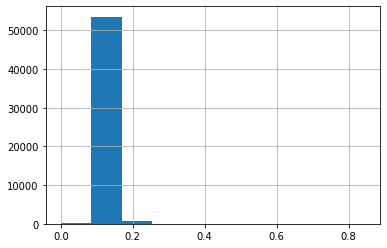

In [23]:
y_pred_prob_train.hist()

<AxesSubplot:>

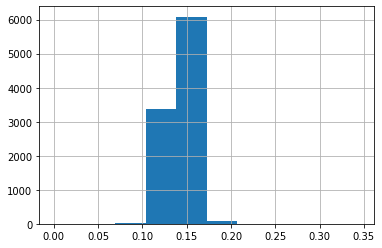

In [24]:
y_pred_prob_valid.hist()

#### >>> INDICADORES DE PROBABILIDAD

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [26]:
auc = roc_auc_score(y_train, y_pred_prob_train)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

auc = roc_auc_score(y_valid, y_pred_prob_valid)
print("AUC: %1.3f" % auc)
print("GINI: %1.3f" % (2*auc-1))

AUC: 0.516
GINI: 0.033
AUC: 0.503
GINI: 0.006


#### >>> INDICADORES DE CLASE

In [27]:
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train))

RECALL     : 0.00013043
EFECTIVIDAD: 1.00000000
F1 SCORE   : 0.00026082


In [28]:
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid))

RECALL     : 0.00000000
EFECTIVIDAD: 0.00000000
F1 SCORE   : 0.00000000


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### >> CAMBIO DE PUNTO DE CORTE

In [29]:
from scipy.optimize import differential_evolution


optimization = differential_evolution(
    lambda c: -1*recall_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)],
    seed=SEED
)
optimization

     fun: -1.0
 message: 'Optimization terminated successfully.'
    nfev: 122
     nit: 7
 success: True
       x: array([0.01298791])

In [30]:
optimization_auc = differential_evolution(
    lambda c: -1*roc_auc_score(y_train, np.array([0 if _ < c[0] else 1 for _ in y_pred_prob_train])), 
    [(0, 1)],
    seed=SEED
)
optimization_auc

     fun: -0.5023018076410165
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 1
 success: True
       x: array([0.12192201])

In [31]:
nuevo_corte = optimization_auc["x"][0]
nuevo_corte

0.12192200646606993

In [32]:
y_pred_class_train_opt = np.where(y_pred_prob_train < nuevo_corte, 0 , 1)
y_pred_class_valid_opt = np.where(y_pred_prob_valid < nuevo_corte, 0 , 1)

In [33]:
pd.Series(y_pred_class_train_opt).value_counts()

1    52818
0     1497
dtype: int64

In [34]:
y_train.value_counts()

Incumplimiento
0                 46648
1                  7667
dtype: int64

In [35]:
pd.Series(y_pred_class_valid_opt).value_counts()

1    9331
0     255
dtype: int64

In [36]:
y_valid.value_counts()

Incumplimiento
0                 8233
1                 1353
dtype: int64

In [37]:
print("/"*25, ' TRAIN')
print("RECALL     : %1.8f" % recall_score(y_train, y_pred_class_train_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_train, y_pred_class_train_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_train, y_pred_class_train_opt))

print("/"*25, ' VALIDATION')
print("RECALL     : %1.8f" % recall_score(y_valid, y_pred_class_valid_opt))
print("EFECTIVIDAD: %1.8f" % precision_score(y_valid, y_pred_class_valid_opt))
print("F1 SCORE   : %1.8f" % f1_score(y_valid, y_pred_class_valid_opt))

/////////////////////////  TRAIN
RECALL     : 0.97639233
EFECTIVIDAD: 0.14173199
F1 SCORE   : 0.24753245
/////////////////////////  VALIDATION
RECALL     : 0.97339246
EFECTIVIDAD: 0.14114243
F1 SCORE   : 0.24653688


In [38]:
top_iv = [row[0] for row in listado_mayor_prob_corte][:len(cols_aporte) + 5]
top_iv

NameError: name 'cols_aporte' is not defined